# Chapter 14. pandas

In [2]:
import pandas as pd
import numpy as np

In [5]:
obj = pd.Series([5, -4, 7, 0, 12])
print(obj)

0     5
1    -4
2     7
3     0
4    12
dtype: int64


In [6]:
# ex 14-2
obj = pd.Series([8, -20, -3, 13, 2])

print(obj.values)
print(obj.index)
print(obj[2])

[  8 -20  -3  13   2]
RangeIndex(start=0, stop=5, step=1)
-3


In [7]:
# ex 14-3
obj = pd.Series([10,20,30,40,50], index=['a', 'b', 'c', 'd', 'e'])
print(obj)

print(obj['c'])
print(obj[['d', 'a']])
print(obj[1:4])

a    10
b    20
c    30
d    40
e    50
dtype: int64
30
d    40
a    10
dtype: int64
b    20
c    30
d    40
dtype: int64


In [8]:
# ex 14-4
obj = pd.Series([10,20,30,40,50])

print(obj * 10)
print(obj[obj>25])

0    100
1    200
2    300
3    400
4    500
dtype: int64
2    30
3    40
4    50
dtype: int64


In [9]:
# ex 14-5
pop = pd.Series([9765623, 3441453, 2461769], index= ['서울', '부산', '대구'])

for i, v in pop.items():
    print('%s : %d명' %(i,v))

서울 : 9765623명
부산 : 3441453명
대구 : 2461769명


In [10]:
# ex 14-6
pop = pd.Series({'서울':9765623, '부산':3441453, '대구':2461769}, index = ['서울', '부산', '대구', '광주', '대전'])

print(pop)

pop['광주'] = 149336

print('광주시 인구 : %.0f' %pop['광주'])

서울    9765623.0
부산    3441453.0
대구    2461769.0
광주          NaN
대전          NaN
dtype: float64
광주시 인구 : 149336


In [11]:
pop.isna()

서울    False
부산    False
대구    False
광주    False
대전     True
dtype: bool

In [12]:
pop = pop.fillna(0)
pop

서울    9765623.0
부산    3441453.0
대구    2461769.0
광주     149336.0
대전          0.0
dtype: float64

In [13]:
pop.sum()

15818181.0

In [14]:
pop.mean()

3163636.2

## DataFrame

In [15]:
# ex 14-7
data = {'이름':['홍지수', '안지영', '김성수', '최예린'], 
        '아이디':['jshong', 'jyahn', 'sukim', 'yrchoi'],
        '비밀번호': ['1234', '1234','1234', '1234']}

frame = pd.DataFrame(data)
print(frame)

    이름     아이디  비밀번호
0  홍지수  jshong  1234
1  안지영   jyahn  1234
2  김성수   sukim  1234
3  최예린  yrchoi  1234


In [16]:
# ex 14-8
member = {'이름':['김영준', '한지원'], 
          '나이':[20,23], 
          '전화번호':['010-3535-4576','010-1295-7899']}

frame = pd.DataFrame(member, columns = ['이름', '전화번호', '나이', '주소'], index = ['01', '02'])
print(frame)

     이름           전화번호  나이   주소
01  김영준  010-3535-4576  20  NaN
02  한지원  010-1295-7899  23  NaN


In [17]:
# ex 14-9
data = {'학교명':['가나고', '다라고', '마바고', '사아고', '자차고'],
       '학급수' : [25,23,15,19,10],
       '학생수' : [620, 600, 550, 580, 400],
       '교사수' : [80, 95, 70, 90, 65]}

frame = pd.DataFrame(data, index = ['01','02', '03', '04', '05'])
print(frame)

print(frame.loc['02','학생수'])
print(frame.loc['04',['학교명','학급수','교사수']])

    학교명  학급수  학생수  교사수
01  가나고   25  620   80
02  다라고   23  600   95
03  마바고   15  550   70
04  사아고   19  580   90
05  자차고   10  400   65
600
학교명    사아고
학급수     19
교사수     90
Name: 04, dtype: object


In [5]:
# ex 14-10
data = {'아이디':['kim', 'song', 'han', 'choi'],
       '구매상품' : ['상품A', '상품B', '상품C', '상품D'],
       '가격' : [15000,23000,33000,50000],
       '개수':[3, 5, 1, 10],
       '구매일':['0303', '0810', '0120', '0601']}

frame = pd.DataFrame(data)
print(frame)

print(frame.iloc[2,0])
print(frame.iloc[3,:2])
print(frame.iloc[:,[0,4]])

    아이디 구매상품     가격  개수   구매일
0   kim  상품A  15000   3  0303
1  song  상품B  23000   5  0810
2   han  상품C  33000   1  0120
3  choi  상품D  50000  10  0601
han
아이디     choi
구매상품     상품D
Name: 3, dtype: object
    아이디   구매일
0   kim  0303
1  song  0810
2   han  0120
3  choi  0601


In [6]:
frame['개수'][1], frame.loc[1, '개수']

(5, 5)

In [7]:
frame.iloc[1,3]

5

In [8]:
frame.iloc[1:,0:2]

,아이디,구매상품
1,song,상품B
2,han,상품C
3,choi,상품D


In [9]:
frame2 = frame.iloc[:,1:]
frame2

,구매상품,가격,개수,구매일
0,상품A,15000,3,0303
1,상품B,23000,5,0810
2,상품C,33000,1,0120
3,상품D,50000,10,0601


In [21]:
frame2.sum(axis =1)

frame['합계'] = frame2.sum(axis=1)
frame

,아이디,구매상품,가격,개수,구매일,평균,합계
0,kim,상품A,15000,3,0303,7501.5,15003
1,song,상품B,23000,5,0810,11502.5,23005
2,han,상품C,33000,1,0120,16500.5,33001
3,choi,상품D,50000,10,0601,25005.0,50010


In [12]:
frame2.mean(axis=1)

0     7501.5
1    11502.5
2    16500.5
3    25005.0
dtype: float64

In [22]:
frame['평균'] = frame2.mean(axis=1)

frame

,아이디,구매상품,가격,개수,구매일,평균,합계
0,kim,상품A,15000,3,0303,7501.5,15003
1,song,상품B,23000,5,0810,11502.5,23005
2,han,상품C,33000,1,0120,16500.5,33001
3,choi,상품D,50000,10,0601,25005.0,50010


In [23]:
frame[['아이디', '합계', '평균']]

,아이디,합계,평균
0,kim,15003,7501.5
1,song,23005,11502.5
2,han,33001,16500.5
3,choi,50010,25005.0


In [24]:
frame.count()  #데이터의 갯수를 센다

아이디     4
구매상품    4
가격      4
개수      4
구매일     4
평균      4
합계      4
dtype: int64

In [29]:
frame.sort_values(by=['합계'])

,아이디,구매상품,가격,개수,구매일,평균,합계
0,kim,상품A,15000,3,0303,7501.5,15003
1,song,상품B,23000,5,0810,11502.5,23005
2,han,상품C,33000,1,0120,16500.5,33001
3,choi,상품D,50000,10,0601,25005.0,50010


In [28]:
np.random.seed(2)
df = pd.DataFrame(np.random.randint(5, size=(4,4)), dtype=float)
df.iloc[2,3] = np.nan
df

,0,1,2,3
0,0.0,0.0,3.0,2.0
1,3.0,0.0,2.0,1.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


## apply 변형

In [33]:
df3 = pd.DataFrame({
    'A':[1,3,4,3,4],
    'B':[2,3,1,2,3],
    'C':[1,5,2,4,4]
})
df3

,A,B,C
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [34]:
df3.apply(lambda x: x.max() - x.min()) 
#apply(): apply메서드의 인수에 있는 각 열(또는 행)을 반복하여 그 함수를 적용

A    3
B    2
C    4
dtype: int64

In [35]:
df3.apply(lambda x: x.max() - x.min(), axis=1)

0    1
1    2
2    3
3    2
4    1
dtype: int64

In [37]:
df3.apply(pd.value_counts)

,A,B,C
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [38]:
df3.apply(pd.value_counts).fillna(0).astype(int)

,A,B,C
1,1,1,1
2,0,2,1
3,2,2,0
4,2,0,2
5,0,0,1


In [4]:
# ex 14-11
scores = {'이름':['김지영', '안지수','최성수', '황예린', '김소정'],
         '국어':[95,97,90,94,87],'영어':[90,86,93,85,93],'수학':[85,88,89,88,99]}

frame = pd.DataFrame(scores)
print(frame)

frame2 = frame.iloc[:,[1,2,3]]
frame2 = frame.loc['이름', '영어','국어']
print(frame2)

total = frame2.sum(axis = 1)
print(total)

    이름  국어  영어  수학
0  김지영  95  90  85
1  안지수  97  86  88
2  최성수  90  93  89
3  황예린  94  85  88
4  김소정  87  93  99


IndexingError: Too many indexers

In [32]:
# ex 14-12
scores = {'이름':['김지영', '안지수','최성수', '황예린', '김소정'],
         '국어':[95,97,90,94,87],'영어':[90,86,93,85,93],'수학':[85,88,89,88,99]}

frame = pd.DataFrame(scores)
frame2 = frame.iloc[:,[1,2,3]]

total = frame2.sum(axis=1)
avg = frame2.mean(axis=1)

print('-'*50)
print('이름  합계 평균')
print('-'*50)
for i in range(5):
    print('%s %d %.2f' %(frame.iloc[i,0],total.iloc[i],avg.iloc[i]))

print('-'*50)


--------------------------------------------------
이름  합계 평균
--------------------------------------------------
김지영 270 90.00
안지수 271 90.33
최성수 272 90.67
황예린 267 89.00
김소정 279 93.00
--------------------------------------------------


In [5]:
# ex 14-13

import population as pop

list_data=[]
pop.get_list(list_data)
print(list_data)

[['서울특별시  (1100000000)', '부산광역시  (2600000000)', '대구광역시  (2700000000)', '인천광역시  (2800000000)', '광주광역시  (2900000000)', '대전광역시  (3000000000)', '울산광역시  (3100000000)', '세종특별자치시  (3600000000)', '경기도  (4100000000)', '강원도  (4200000000)', '충청북도  (4300000000)', '충청남도  (4400000000)', '전라북도  (4500000000)', '전라남도  (4600000000)', '경상북도  (4700000000)', '경상남도  (4800000000)', '제주특별자치도  (5000000000)'], ['9,736,962', '3,410,925', '2,432,883', '2,954,955', '1,456,121', '1,473,125', '1,145,710', '343,788', '13,265,377', '1,539,521', '1,598,599', '2,120,995', '1,815,112', '1,861,894', '2,658,956', '3,358,828', '670,876'], ['4,345,877', '1,502,333', '1,033,349', '1,242,107', '618,503', '637,726', '469,551', '136,629', '5,497,087', '721,003', '723,931', '961,890', '818,452', '873,871', '1,229,265', '1,455,655', '293,932'], ['      2.24', '      2.27', '      2.35', '      2.38', '      2.35', '      2.31', '      2.44', '      2.52', '      2.41', '      2.14', '      2.21', '      2.21', '      2.22', '     

In [1]:
# ex 14-14
import population as pop

list_data = [] 

pop.get_list(list_data)

dict_data = {}

keys = ['지역', '총인구수', '세대수', '세대당_인구', '남자_인구수', '여자_인구수', '남여_비율']

pop.get_dict(list_data, keys, dict_data)

print(dict_data)

{'지역': ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도'], '총인구수': [9736962, 3410925, 2432883, 2954955, 1456121, 1473125, 1145710, 343788, 13265377, 1539521, 1598599, 2120995, 1815112, 1861894, 2658956, 3358828, 670876], '세대수': [4345877, 1502333, 1033349, 1242107, 618503, 637726, 469551, 136629, 5497087, 721003, 723931, 961890, 818452, 873871, 1229265, 1455655, 293932], '세대당_인구': [2.24, 2.27, 2.35, 2.38, 2.35, 2.31, 2.44, 2.52, 2.41, 2.14, 2.21, 2.21, 2.22, 2.13, 2.16, 2.31, 2.28], '남자_인구수': [4745133, 1673266, 1202364, 1481133, 720686, 735791, 588626, 171403, 6672706, 774358, 809805, 1081153, 902365, 934900, 1338907, 1690600, 337295], '여자_인구수': [4991829, 1737659, 1230519, 1473822, 735435, 737334, 557084, 172385, 6592671, 765163, 788794, 1039842, 912747, 926994, 1320049, 1668228, 333581], '남여_비율': [0.95, 0.96, 0.98, 1.0, 0.98, 1.0, 1.06, 0.99, 1.01, 1.01, 1.03, 1.04, 0.99, 1.01, 1.01, 1.01, 

In [2]:
# ex 14-15
import population as pop
import pandas as pd

list_data=[]

pop.get_list(list_data)

dict_data = {}

keys = ['지역', '총인구수', '세대수', '세대당_인구', '남자_인구수', '여자_인구수', '남여_비율']

pop.get_dict(list_data, keys, dict_data)

frame = pd.DataFrame(dict_data)
print(frame)


         지역      총인구수      세대수  세대당_인구   남자_인구수   여자_인구수  남여_비율
0     서울특별시   9736962  4345877    2.24  4745133  4991829   0.95
1     부산광역시   3410925  1502333    2.27  1673266  1737659   0.96
2     대구광역시   2432883  1033349    2.35  1202364  1230519   0.98
3     인천광역시   2954955  1242107    2.38  1481133  1473822   1.00
4     광주광역시   1456121   618503    2.35   720686   735435   0.98
5     대전광역시   1473125   637726    2.31   735791   737334   1.00
6     울산광역시   1145710   469551    2.44   588626   557084   1.06
7   세종특별자치시    343788   136629    2.52   171403   172385   0.99
8       경기도  13265377  5497087    2.41  6672706  6592671   1.01
9       강원도   1539521   721003    2.14   774358   765163   1.01
10     충청북도   1598599   723931    2.21   809805   788794   1.03
11     충청남도   2120995   961890    2.21  1081153  1039842   1.04
12     전라북도   1815112   818452    2.22   902365   912747   0.99
13     전라남도   1861894   873871    2.13   934900   926994   1.01
14     경상북도   2658956  1229265    2.16  

In [3]:
# ex 14-16
import population as pop
import pandas as pd

list_data=[]

pop.get_list(list_data)

dict_data = {}

keys = ['지역', '총인구수', '세대수', '세대당_인구', '남자_인구수', '여자_인구수', '남여_비율']

pop.get_dict(list_data, keys, dict_data)

frame = pd.DataFrame(dict_data)

rank = frame.sort_values(by=['세대수'],ascending = False)
print(rank)

rank = rank.reset_index(drop=True)
print(rank)

         지역      총인구수      세대수  세대당_인구   남자_인구수   여자_인구수  남여_비율
8       경기도  13265377  5497087    2.41  6672706  6592671   1.01
0     서울특별시   9736962  4345877    2.24  4745133  4991829   0.95
1     부산광역시   3410925  1502333    2.27  1673266  1737659   0.96
15     경상남도   3358828  1455655    2.31  1690600  1668228   1.01
3     인천광역시   2954955  1242107    2.38  1481133  1473822   1.00
14     경상북도   2658956  1229265    2.16  1338907  1320049   1.01
2     대구광역시   2432883  1033349    2.35  1202364  1230519   0.98
11     충청남도   2120995   961890    2.21  1081153  1039842   1.04
13     전라남도   1861894   873871    2.13   934900   926994   1.01
12     전라북도   1815112   818452    2.22   902365   912747   0.99
10     충청북도   1598599   723931    2.21   809805   788794   1.03
9       강원도   1539521   721003    2.14   774358   765163   1.01
5     대전광역시   1473125   637726    2.31   735791   737334   1.00
4     광주광역시   1456121   618503    2.35   720686   735435   0.98
6     울산광역시   1145710   469551    2.44  

In [6]:
# ex 14-16
import population as pop
import pandas as pd

list_data=[]

pop.get_list(list_data)

dict_data = {}

keys = ['지역', '총인구수', '세대수', '세대당_인구', '남자_인구수', '여자_인구수', '남여_비율']

pop.get_dict(list_data, keys, dict_data)

frame = pd.DataFrame(dict_data)
frame2 = frame.iloc[:,[1,2,4,5]]
print(frame2)

sum = frame2.sum(axis=0)
print(sum)

print('-'*50)
print('국내 전체 인구 통계')
print('-'*50)
print('-총 인구수: %d명' %sum.iloc[0])
print('-총 세대수: %d명' %sum.iloc[1])
print('-총 남자 인구수: %d명' %sum.iloc[2])
print('-총 여자 인구수: %d명' %sum.iloc[3])
print('-'*50)

        총인구수      세대수   남자_인구수   여자_인구수
0    9736962  4345877  4745133  4991829
1    3410925  1502333  1673266  1737659
2    2432883  1033349  1202364  1230519
3    2954955  1242107  1481133  1473822
4    1456121   618503   720686   735435
5    1473125   637726   735791   737334
6    1145710   469551   588626   557084
7     343788   136629   171403   172385
8   13265377  5497087  6672706  6592671
9    1539521   721003   774358   765163
10   1598599   723931   809805   788794
11   2120995   961890  1081153  1039842
12   1815112   818452   902365   912747
13   1861894   873871   934900   926994
14   2658956  1229265  1338907  1320049
15   3358828  1455655  1690600  1668228
16    670876   293932   337295   333581
총인구수      51844627
세대수       22561161
남자_인구수    25860491
여자_인구수    25984136
dtype: int64
--------------------------------------------------
국내 전체 인구 통계
--------------------------------------------------
-총 인구수: 51844627명
-총 세대수: 22561161명
-총 남자 인구수: 25860491명
-총 여자 인구수: 25984136명

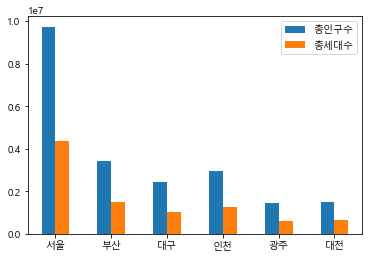

In [8]:
import population as pop
import pandas as pd
from matplotlib import rc
rc('font',family='Malgun Gothic')

list_data=[]

pop.get_list(list_data)

keys = ['지역', '총인구수', '세대수', '세대당_인구', '남자_인구수', '여자_인구수', '남여_비율']

dict_data ={}

pop.get_dict(list_data,keys, dict_data)

frame = pd.DataFrame(dict_data)
index = ['서울','부산','대구','인천','광주','대전']

x1 = frame.iloc[:6,1]
x1 = x1.values.tolist()

x2 = frame.iloc[:6,2]
x2 = x2.values.tolist()

df = pd.DataFrame({'총인구수':x1, '총세대수':x2}, index=index)
ax = df.plot.bar(rot=0)

## CSV 파일 ==> 데이터 프레임

In [9]:
df = pd.read_csv('population_2020.csv')
df

,행정구역,2020년02월_총인구수,2020년02월_세대수,2020년02월_세대당 인구,2020년02월_남자 인구수,2020년02월_여자 인구수,2020년02월_남여 비율
0,서울특별시 (1100000000),"9,736,962","4,345,877",2.24,"4,745,133","4,991,829",0.95
1,부산광역시 (2600000000),"3,410,925","1,502,333",2.27,"1,673,266","1,737,659",0.96
2,대구광역시 (2700000000),"2,432,883","1,033,349",2.35,"1,202,364","1,230,519",0.98
3,인천광역시 (2800000000),"2,954,955","1,242,107",2.38,"1,481,133","1,473,822",1.00
4,광주광역시 (2900000000),"1,456,121","618,503",2.35,"720,686","735,435",0.98
5,대전광역시 (3000000000),"1,473,125","637,726",2.31,"735,791","737,334",1.00
6,울산광역시 (3100000000),"1,145,710","469,551",2.44,"588,626","557,084",1.06
7,세종특별자치시 (3600000000),"343,788","136,629",2.52,"171,403","172,385",0.99
8,경기도 (4100000000),"13,265,377","5,497,087",2.41,"6,672,706","6,592,671",1.01
9,강원도 (4200000000),"1,539,521","721,003",2.14,"774,358","765,163",1.01


In [11]:
df2 = pd.read_csv('population_2020.csv', skiprows=[0]) 
df2

,서울특별시 (1100000000),"9,736,962","4,345,877",2.24,"4,745,133","4,991,829",0.95
0,부산광역시 (2600000000),"3,410,925","1,502,333",2.27,"1,673,266","1,737,659",0.96
1,대구광역시 (2700000000),"2,432,883","1,033,349",2.35,"1,202,364","1,230,519",0.98
2,인천광역시 (2800000000),"2,954,955","1,242,107",2.38,"1,481,133","1,473,822",1.00
3,광주광역시 (2900000000),"1,456,121","618,503",2.35,"720,686","735,435",0.98
4,대전광역시 (3000000000),"1,473,125","637,726",2.31,"735,791","737,334",1.00
5,울산광역시 (3100000000),"1,145,710","469,551",2.44,"588,626","557,084",1.06
6,세종특별자치시 (3600000000),"343,788","136,629",2.52,"171,403","172,385",0.99
7,경기도 (4100000000),"13,265,377","5,497,087",2.41,"6,672,706","6,592,671",1.01
8,강원도 (4200000000),"1,539,521","721,003",2.14,"774,358","765,163",1.01
9,충청북도 (4300000000),"1,598,599","723,931",2.21,"809,805","788,794",1.03


In [13]:
df2 = pd.read_csv('population_2020.csv', 
                  names=['총인구수', '세대수', '세대당 인구', '남자 인구수', '여자 인구수', '남여 비율']) 
df2

,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
행정구역,2020년02월_총인구수,2020년02월_세대수,2020년02월_세대당 인구,2020년02월_남자 인구수,2020년02월_여자 인구수,2020년02월_남여 비율
서울특별시 (1100000000),"9,736,962","4,345,877",2.24,"4,745,133","4,991,829",0.95
부산광역시 (2600000000),"3,410,925","1,502,333",2.27,"1,673,266","1,737,659",0.96
대구광역시 (2700000000),"2,432,883","1,033,349",2.35,"1,202,364","1,230,519",0.98
인천광역시 (2800000000),"2,954,955","1,242,107",2.38,"1,481,133","1,473,822",1.00
광주광역시 (2900000000),"1,456,121","618,503",2.35,"720,686","735,435",0.98
대전광역시 (3000000000),"1,473,125","637,726",2.31,"735,791","737,334",1.00
울산광역시 (3100000000),"1,145,710","469,551",2.44,"588,626","557,084",1.06
세종특별자치시 (3600000000),"343,788","136,629",2.52,"171,403","172,385",0.99
경기도 (4100000000),"13,265,377","5,497,087",2.41,"6,672,706","6,592,671",1.01


In [34]:
df2 = pd.read_csv('population_2020.csv', skiprows=[0], thousands=',',
                  names=['총인구수', '세대수', '세대당 인구', '남자 인구수', '여자 인구수', '남여 비율'])
df2

#thousands =',' -> ,없어진다

,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
서울특별시 (1100000000),9736962,4345877,2.24,4745133,4991829,0.95
부산광역시 (2600000000),3410925,1502333,2.27,1673266,1737659,0.96
대구광역시 (2700000000),2432883,1033349,2.35,1202364,1230519,0.98
인천광역시 (2800000000),2954955,1242107,2.38,1481133,1473822,1.00
광주광역시 (2900000000),1456121,618503,2.35,720686,735435,0.98
대전광역시 (3000000000),1473125,637726,2.31,735791,737334,1.00
울산광역시 (3100000000),1145710,469551,2.44,588626,557084,1.06
세종특별자치시 (3600000000),343788,136629,2.52,171403,172385,0.99
경기도 (4100000000),13265377,5497087,2.41,6672706,6592671,1.01
강원도 (4200000000),1539521,721003,2.14,774358,765163,1.01


In [37]:
df3 = df2.astype({'총인구수':int})
df3

,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
서울특별시 (1100000000),9736962,4345877,2.24,4745133,4991829,0.95
부산광역시 (2600000000),3410925,1502333,2.27,1673266,1737659,0.96
대구광역시 (2700000000),2432883,1033349,2.35,1202364,1230519,0.98
인천광역시 (2800000000),2954955,1242107,2.38,1481133,1473822,1.00
광주광역시 (2900000000),1456121,618503,2.35,720686,735435,0.98
대전광역시 (3000000000),1473125,637726,2.31,735791,737334,1.00
울산광역시 (3100000000),1145710,469551,2.44,588626,557084,1.06
세종특별자치시 (3600000000),343788,136629,2.52,171403,172385,0.99
경기도 (4100000000),13265377,5497087,2.41,6672706,6592671,1.01
강원도 (4200000000),1539521,721003,2.14,774358,765163,1.01


In [38]:
df3[['총인구수','세대수','남자 인구수','여자 인구수']].sum()

총인구수      51844627
세대수       22561161
남자 인구수    25860491
여자 인구수    25984136
dtype: int64

In [39]:
# 한글 폰트 사용(Matplotlib사용 전 기본 설정해주기)
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False
mpl.rc('font', family = 'Malgun Gothic')

In [40]:
mpl.rcParams['figure.figsize']=(12,6)
mpl.rcParams['font.size']=14

In [51]:
df4 = df3. iloc[:7,0:2]
df4

,총인구수,세대수
서울특별시 (1100000000),9736962,4345877
부산광역시 (2600000000),3410925,1502333
대구광역시 (2700000000),2432883,1033349
인천광역시 (2800000000),2954955,1242107
광주광역시 (2900000000),1456121,618503
대전광역시 (3000000000),1473125,637726
울산광역시 (3100000000),1145710,469551


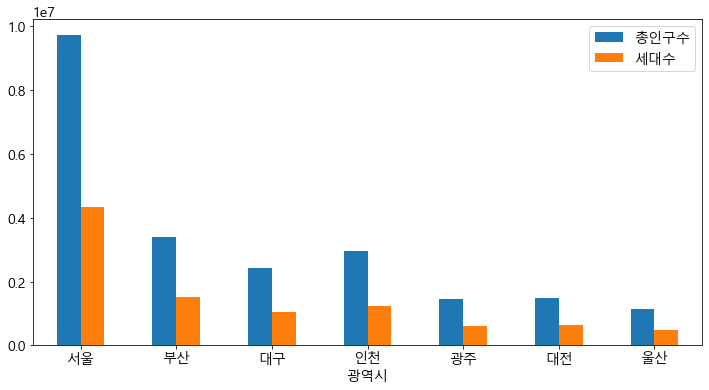

In [61]:
df4 = df3. iloc[:7,0:2]
df4.reset_index(drop=True) #인덱스가 없어짐(서울특별시(1100000000)등과 같은)
#새로운 인덱스의 칼럼을 먼저 준 후 바꿔 주면 된다.
df4['광역시']=['서울','부산','대구','인천','광주','대전','울산']
df4 = df4.set_index('광역시')

df4.plot.bar(rot=0)
plt.show()

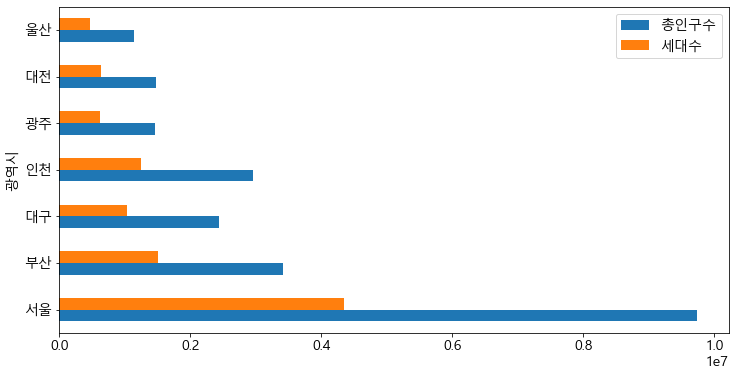

In [63]:
df4.plot(kind='barh')
plt.show()

In [59]:
df = pd.read_csv('population_age_2020.csv')
df

,지역,총인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
0,서울,9736962,658355,813563,1455903,1505729,1563968,1539385,1200518,688818,263939,40404,6380
1,부산,3410925,241624,281120,434692,431911,518321,580966,511174,285602,109312,14396,1807
2,대구,2432883,186623,234528,321487,303397,391997,428622,311274,171217,74227,8817,694
3,인천,2954955,239941,281097,405835,417708,490716,515758,344843,172269,74306,11574,908
4,광주,1456121,125396,162728,207554,191432,244903,234048,155056,91020,38050,5529,405
5,대전,1473125,120476,151861,212143,199106,242381,243526,170291,88289,39190,5523,339
6,울산,1145710,103399,115623,147745,158271,190698,211255,136520,57438,21610,2991,160
7,세종,343788,47454,40574,36273,61442,65714,42907,27813,13609,6863,1084,55
8,경기도,13265377,1178548,1347854,1769080,1917785,2299179,2205106,1422638,742296,330231,48650,4010
9,강원도,1539521,108694,141975,179813,169694,227950,269666,226444,135668,68321,10493,803
